#** Video Title Categorization**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

In [0]:
data_dir = os.path.join('gdrive', 'My Drive', 'Assignment 1', 'data', 'category')
sport_f = os.path.join(data_dir, 'id_video_sport.txt')
tech_f = os.path.join(data_dir, 'id_video_tech.txt')
politics_f = os.path.join(data_dir, 'id_video_politics.txt')
games_f = os.path.join(data_dir, 'id_video_games.txt')
lifestyle_f = os.path.join(data_dir, 'id_video_title_lifestyle.txt')

# Read texts into list
def read_lines(filepath):
    with open(filepath, encoding='UTF-8') as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content

sport = read_lines(sport_f)
tech = read_lines(tech_f)
politics = read_lines(politics_f)
games = read_lines(games_f)
lifestyle = read_lines(lifestyle_f)

data = {'sport':sport, 'tech': tech, 'politics': politics, 'games': games, 'lifestyle': lifestyle}
len_data=[len(sport), len(tech), len(politics), len(games), len(lifestyle)]

print('data size: {}, {}, {}, {}, {}'.format(len(sport), len(tech), len(politics), len(games), len(lifestyle)))
print('len total : {}'.format(len(sport)+len(tech)+len(politics)+len(games)+len(lifestyle)))

data size: 7978, 20794, 31499, 8921, 19768
len total : 88960


In [0]:
import pandas as pd

In [0]:
def create_dataframe_with_label(df, data, index):
    # make label
    label = []
    for _ in data:
        label.append(index)
    # create a pandas dataframe using texts and labels
    df1 = pd.DataFrame()
    df1['text'] = data
    df1['label'] = label
    df=df.append(df1)
    return df

In [0]:
df = pd.DataFrame()
df=create_dataframe_with_label(df, sport, 1);
df=create_dataframe_with_label(df, tech, 2);
df=create_dataframe_with_label(df, politics, 3);
df=create_dataframe_with_label(df, games, 4);
df=create_dataframe_with_label(df, lifestyle, 5);
len(df)

88960

In [0]:
print(df.sample(10))
print('len DataFrame : {}'.format(len(df)))

                                                    text  label
9181          video coklit ppdp kpu kota makassar 2018(2      3
2956   pengganti saints oura saints wizz mainnya ggwp...      4
15434  janji keempat cagub soal kemajuan pendidikan d...      3
11307                   cara menginstal efek kamera dslr      2
2360   sbl se indonesia aksi damai di bandung depan g...      3
13615      bayi demam setelah imunisasi mitos atau fakta      5
11671                  cara mudah mencangkok sawo part 2      5
3791   tz zxuan kw ini mencoba mengelabui moskov 1 gl...      4
3607                                   hut 45 tahun pdip      3
15553                 istri dedi daftar cabup purwakarta      3
len DataFrame : 88960


In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
# percentage of each categorical data
def pie_diagram_rating(frekuensi, data_label):
    total = np.array(frekuensi)*100/sum(frekuensi)
    for i,v in enumerate(total) :
        total[i]=round(v,1)
    # Data to plot
    labels=[]
    for i in range(5):
        labels.append(data_label[i]+':'+str(total[i])+'%')
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
    sizes=frekuensi
    # Plot
    figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    patches, texts = plt.pie(sizes, shadow=True,colors=colors, startangle=140)
    plt.legend(patches, labels, loc="best")
    plt.axis()
    plt.show()

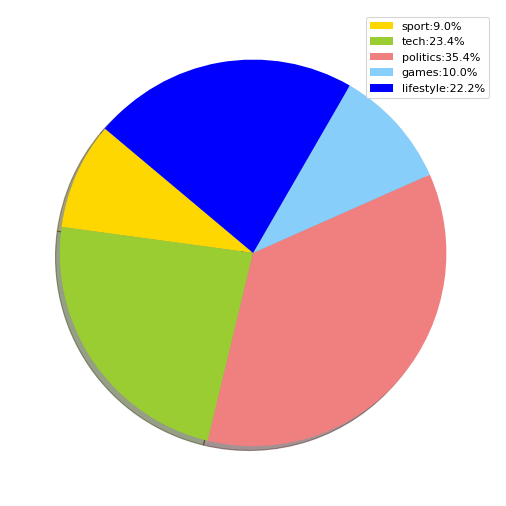

In [0]:
pie_diagram_rating(len_data, list(data))

In [0]:
def load_stop_words():
  # Get the set of stopwords
    data_dir2 = os.path.join('gdrive', 'My Drive', 'Assignment 1', 'data')
    stop_words_f = os.path.join(data_dir2, 'dicts', 'stop_words.txt')
    flines = read_lines(stop_words_f)
    return set([x.strip() for x in flines])

In [0]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [0]:
clean_data = df
clean_data['text'] = clean_data['text'].apply(raw_to_words, stop_words=stop_words)
clean_data = clean_data.loc[clean_data['text']!='']

In [0]:
clean_data.sample(10)

,text,label
1854,debat publik pertama pilgub jatim,3
16149,unlock bootloader c sms resmi,2
21521,prof andalan amankan pks,3
9602,cara ampuh membedakan iphone palsu asli part,2
3313,kreatif generator listrik bbm,2
10381,unboxing redmi x prime gold,2
18859,cara cek kebocoran cara mengatasi bocor,5
26528,motivasi letjen tni edy rahmayadi terjun politik,3
9065,top makeup tutorial compilation from instagram,5
11969,neww membuat garis bantu untuk mempercepat pen...,2


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [0]:
# category = ['sport', 'tech', 'politics' 'games' 'lifestyle']
# for i in range(len(category)):
#     categori[i]
#get each category samples
sport_samples = clean_data.loc[clean_data['label'] == 1]
tech_samples = clean_data.loc[clean_data['label'] == 2]
politics_samples = clean_data.loc[clean_data['label'] == 3]
games_samples = clean_data.loc[clean_data['label'] == 4]
lifestyle_samples = clean_data.loc[clean_data['label'] == 5]

bigtext_sport = " ".join(list(sport_samples['text']))
print(len(bigtext_sport))
bigtext_tech = " ".join(list(tech_samples['text']))
print(len(bigtext_tech))
bigtext_politics = " ".join(list(politics_samples['text']))
print(len(bigtext_politics))
bigtext_games = " ".join(list(games_samples['text']))
print(len(bigtext_games))
bigtext_lifestyle = " ".join(list(lifestyle_samples['text']))
print(len(bigtext_lifestyle))

387162
872102
1681883
424674
844962


------------------SPORT-------------------


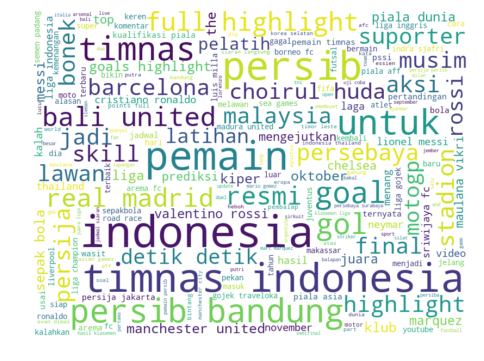

------------------TECHNOLOGY-------------------


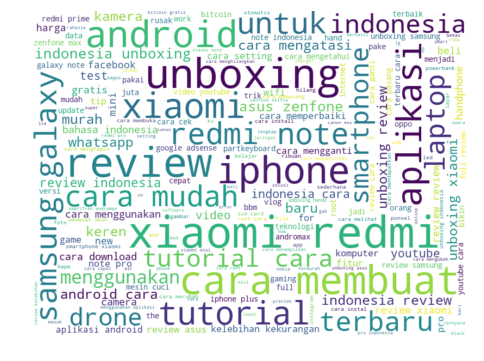

------------------POLITICS-------------------


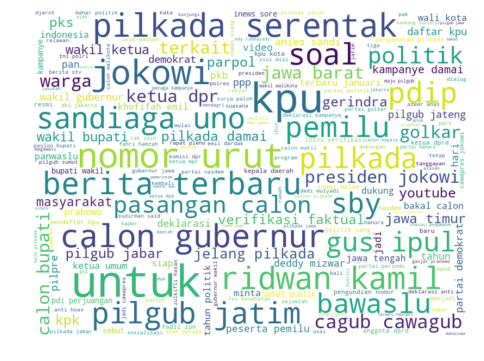

------------------GAMES-------------------


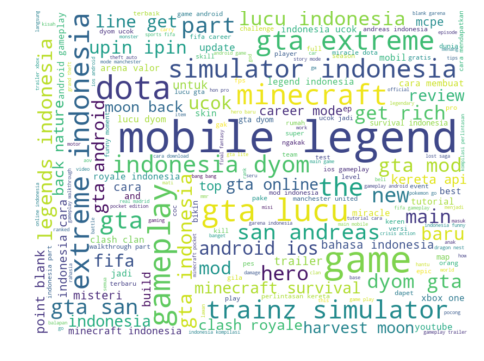

------------------LIFESTYLE-------------------


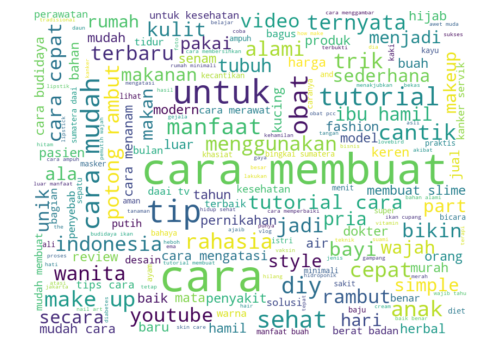

In [0]:
print('------------------SPORT-------------------')
show_wordcloud(bigtext_sport, stop_words)
print('------------------TECHNOLOGY-------------------')
show_wordcloud(bigtext_tech, stop_words)
print('------------------POLITICS-------------------')
show_wordcloud(bigtext_politics, stop_words)
print('------------------GAMES-------------------')
show_wordcloud(bigtext_games, stop_words)
print('------------------LIFESTYLE-------------------')
show_wordcloud(bigtext_lifestyle, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score

In [0]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(clean_data['text'], clean_data['label'])
print(len(train_x), len(valid_x))

66720 22240


In [0]:
# create a count vectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(clean_data['text'])
# transform the training and validation data using count vectorizer
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)
print(xtrain_count.shape, xvalid_count.shape)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(clean_data['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.shape, xvalid_tfidf.shape)

(66720, 45165) (22240, 45165)
(66720, 45165) (22240, 45165)


In [0]:
!pip install scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import time
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = os.path.join('gdrive', 'My Drive', 'DATA TEST TRAIN')
data_file=os.path.join(data_dir, 'train_test_data_3365x642.csv')

In [0]:
data1=pd.read_csv(data_file, index_col=-1).drop(columns='Unnamed: 0')
print(data1.shape)
X=data1.drop(columns='label')
Y=data1['label']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [2]:
#train model
mul_lr = linear_model.LogisticRegression(multi_class='lbfgs', solver='sag').fit(xtrain_tfidf, train_y)

NameError: ignored

In [0]:
# get the predictions
pred_valid = mul_lr.predict(xvalid_tfidf)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid, valid_y))
print("Report:\n", metrics.classification_report(valid_y, pred_valid))

Validation set
Accuracy: 0.9618705035971223
Report:
               precision    recall  f1-score   support

           1       0.97      0.90      0.93      1967
           2       0.95      0.95      0.95      5217
           3       0.99      1.00      0.99      7768
           4       0.95      0.91      0.93      2335
           5       0.93      0.97      0.95      4953

   micro avg       0.96      0.96      0.96     22240
   macro avg       0.96      0.95      0.95     22240
weighted avg       0.96      0.96      0.96     22240



In [0]:
pred1 = mul_lr.predict(doc_by_term)
print(pred1)

[5]


## TEST USING TEXT

In [0]:
def predict(teks):
  x=[]
  x.append(teks)
  clean_teks=raw_to_words(teks, stop_words=stop_words)
  clean_tekstfidf = tfidf_vect.transform(x)
  doc_by_term=pd.DataFrame(clean_tekstfidf.toarray(), columns=tfidf_vect.get_feature_names())
  pred = mul_lr.predict(doc_by_term)
  print('Based on the model the video title is categorize as : '+label_predict(pred).upper())
  
def label_predict(arr):
  data_label=list(data)
  lbl = [[1],[2],[3],[4],[5]]
  hasil = data_label[lbl.index(arr)]
  return str(hasil)
  

In [0]:
print('Input your video titile : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your video titile : 
Bagaimana bermain sepak bola ala mercy
------------------------result------------------
Based on the model the video title is categorize as : SPORT


In [0]:
print('Input your video titile : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your video titile : 
hasil pemilu 2019 sudah keluar, ini dia cuplikannya
------------------------result------------------
Based on the model the video title is categorize as : POLITICS
